# E-commerce Data Insights

- Which products and users generate the most revenue
- What times and patterns indicate peak performance

In [26]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [27]:
# Load Dataset
df = pd.read_excel("Superstore_USA.xlsx")  
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [42]:
# to check whether a cell is having nulls or not
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [41]:
df['Product Base Margin'] = df['Product Base Margin'].fillna(df['Product Base Margin'].mean())

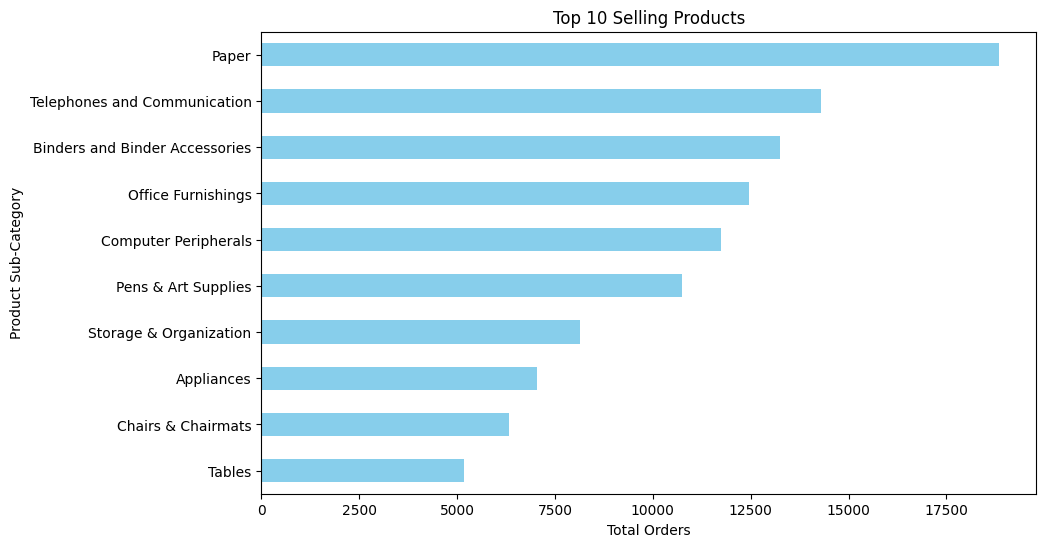

In [30]:
# Top Selling Products
top_products = df.groupby('Product Sub-Category')['Quantity ordered new'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Selling Products', figsize=(10,6), color='skyblue')
plt.xlabel('Total Orders')
plt.gca().invert_yaxis()
plt.show()

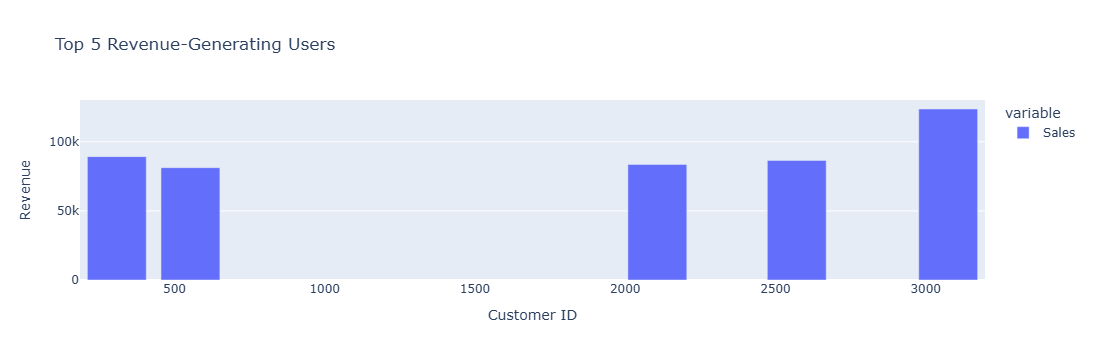

In [31]:
# Top Users by Revenue
top_users = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(5)
fig = px.bar(top_users, title="Top 5 Revenue-Generating Users", labels={'value': 'Revenue', 'Customer ID': 'Customer ID'})
fig.show()

In [43]:
# Order Priority
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [33]:
df['Order Priority'] = df["Order Priority"].replace("Critical ","Critical")

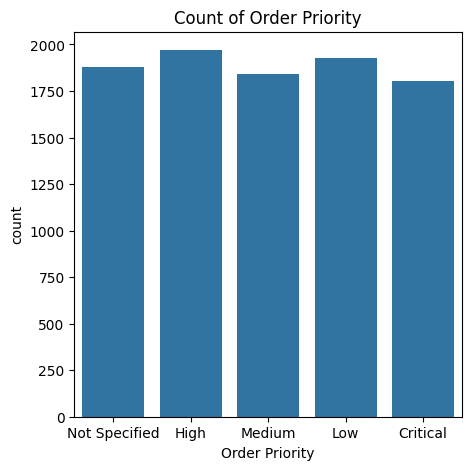

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(x="Order Priority",data=df)
plt.title("Count of Order Priority")
plt.show()

In [44]:
# Ship mode

In [39]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

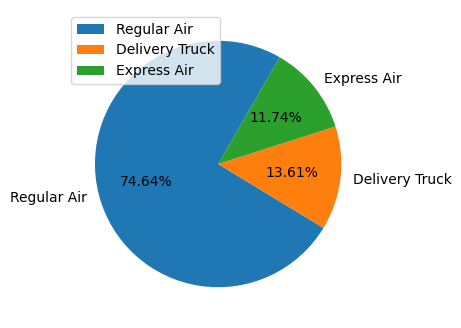

In [40]:
x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle = 60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

# Outcome
- These insights help optimize pricing, marketing, and inventory strategy.